O dataset escolhido contém os dados de uma empresa de telecomunicação americana, setor popularmente conhecido como _telco_.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
%matplotlib inline


/home/guilherme/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_telco = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_telco.shape

(7043, 21)

In [4]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Transformação das Colunas em Colunas Numéricas

### TotalCharges

Algumas linhas que apresentavam uma string vazia foram transformadas em 0.

In [5]:
df_telco['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
def f(x):
    try: return float(x)
    except: return 0

df_telco['TotalCharges'] = df_telco['TotalCharges'].apply(f)

### _gender_

Female: 0, Male: 1

In [7]:
df_telco['gender'] = df_telco['gender'].apply(lambda x: 0 if x == 'Female' else 1)
df_telco['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

### Colunas com valores Yes e No

- No: 0
- Yes: 1
- No Phone Service ou No Internet Service: 2

In [8]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df_telco[col] = df_telco[col].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else 2)

In [9]:
df_telco[yes_no_cols].head()

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,2,0,1,0,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,2,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1


###  _InternetService_

- No: 0
- DSL: 1
- Fiber optic: 2

In [10]:
df_telco['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [11]:
df_telco['InternetService'] = df_telco['InternetService'].apply(lambda x: 0 if x == 'No' else 1 if x == 'DSL' else 2)
df_telco['InternetService'].value_counts()

2    3096
1    2421
0    1526
Name: InternetService, dtype: int64

###  _Contract_

- Month-to-month: 0
- One year:       1
- Two year:       2

In [12]:
df_telco['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [13]:
df_telco['Contract'] = df_telco['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1 if x == 'One year' else 2)
df_telco['Contract'].value_counts()

0    3875
2    1695
1    1473
Name: Contract, dtype: int64

###  _PaymentMethod_

- Electronic check:             0
- Mailed check:                 1
- Bank transfer (automatic):    2
- Credit card (automatic):      3

In [14]:
df_telco['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [15]:
def f2(x):
    if x == 'Electronic check':
        return 0
    elif x == 'Mailed check':
        return 1
    elif x == 'Bank transfer (automatic)':
        return 2
    else:
        return 3
    
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].apply(f2)
df_telco['PaymentMethod'].value_counts()

0    2365
1    1612
2    1544
3    1522
Name: PaymentMethod, dtype: int64

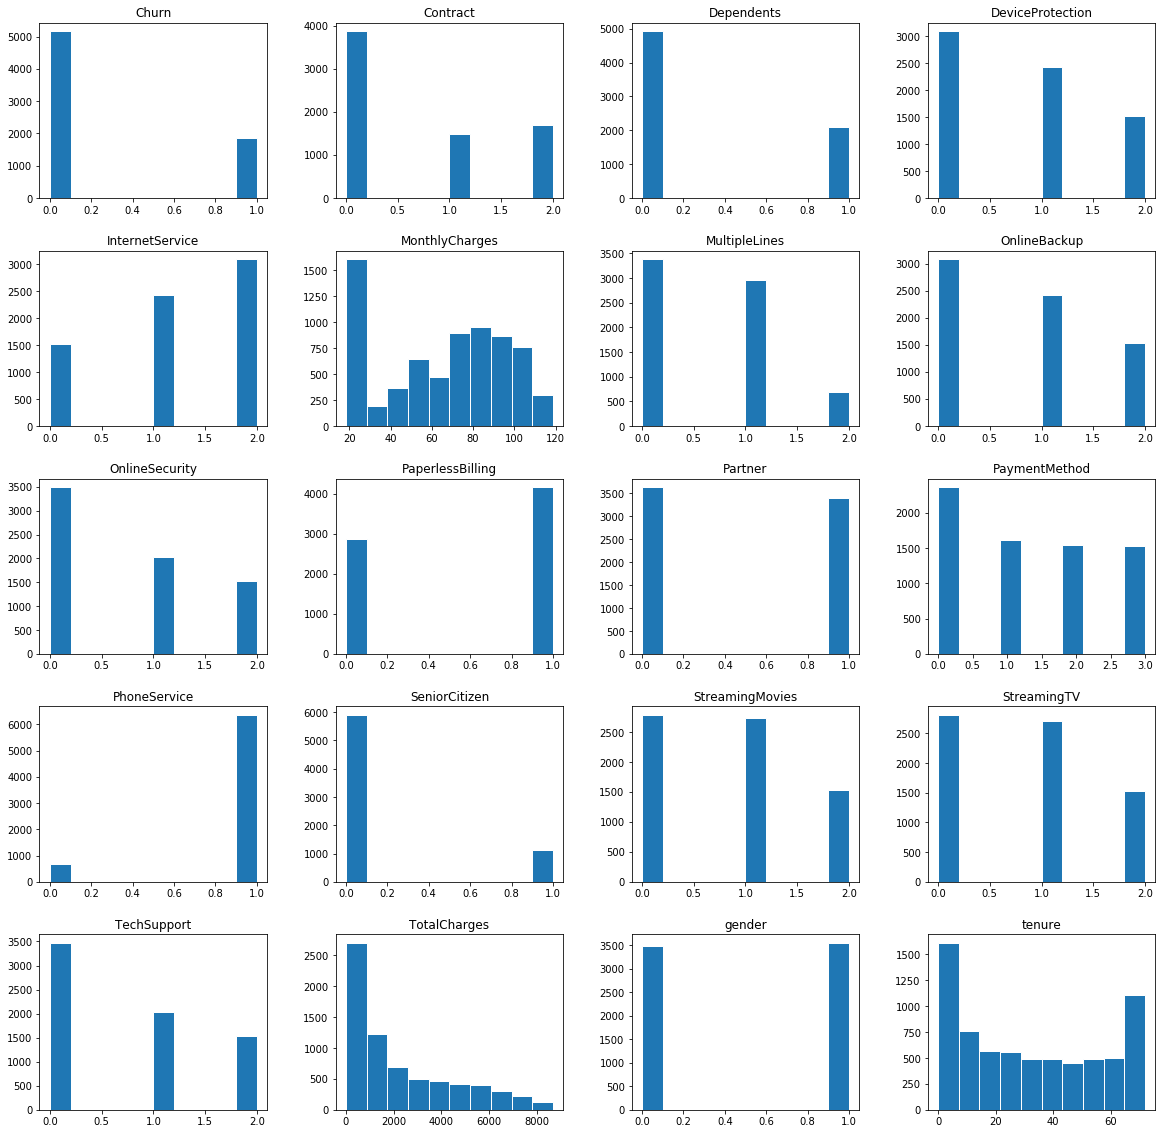

In [84]:
df_telco.hist(edgecolor='white', figsize=(20,20), grid=False);

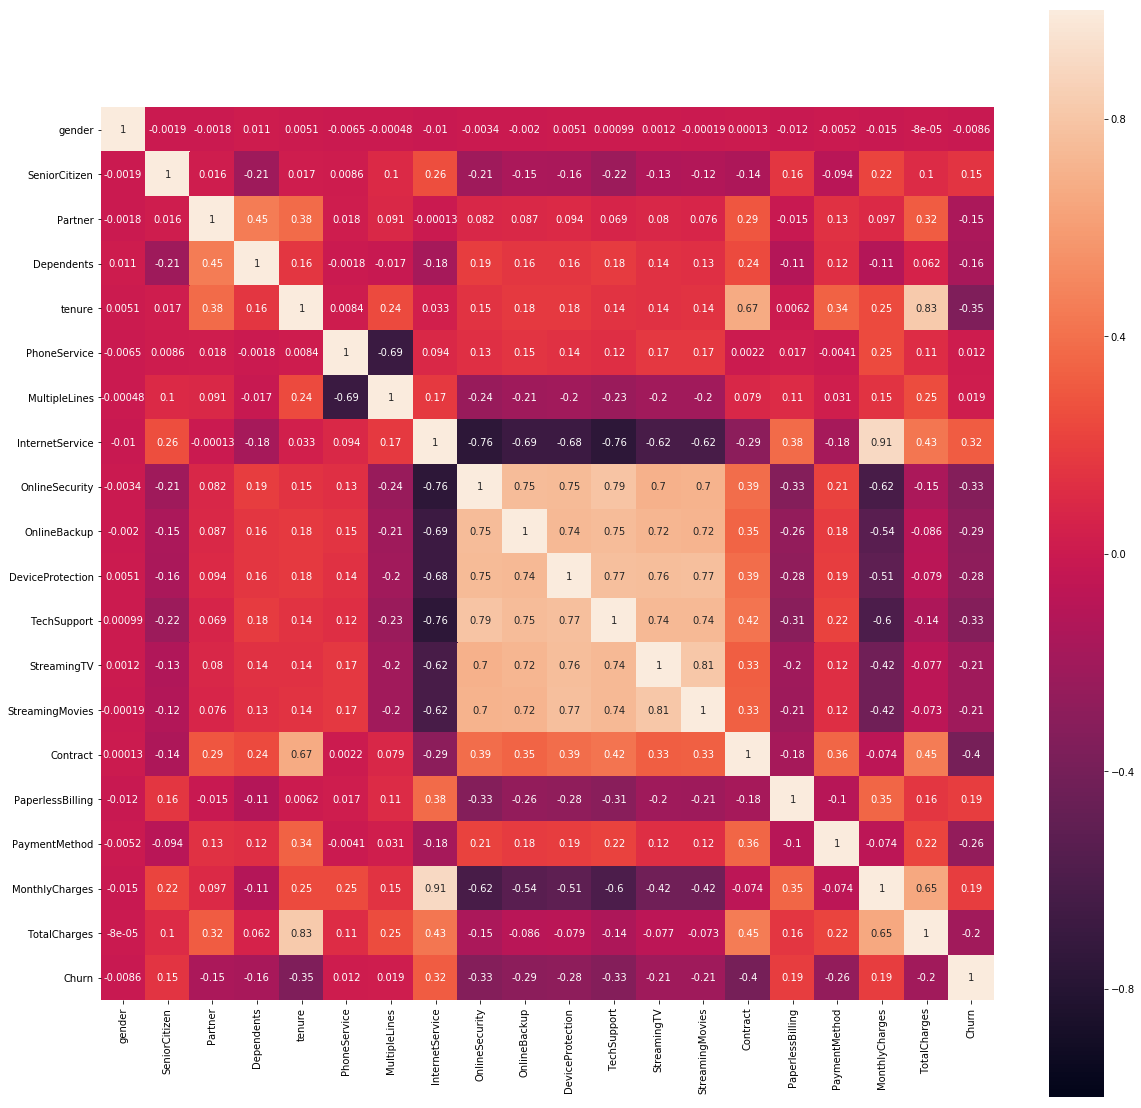

In [85]:
matriz_correlacao = df_telco.corr()
x, y = plt.subplots(figsize=(20,20))

sns.heatmap(
    matriz_correlacao,
    annot=True,
    square=True,
    vmax=1,
    vmin=-1
);

### Features Importances

In [86]:
features = list(df_telco.columns.drop(['Churn','customerID']))
target = 'Churn'


In [87]:
modelo = RandomForestClassifier()

modelo.fit(
    df_telco[features],
    df_telco[target]
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

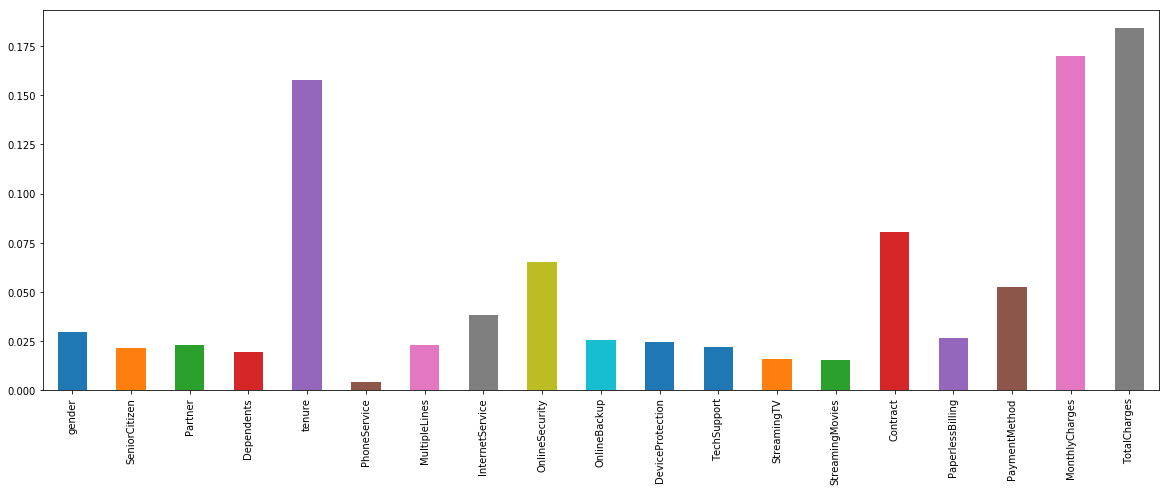

In [88]:
pd.Series(modelo.feature_importances_, features).plot(figsize=(20,7),kind='bar')

In [90]:
df_telco2 = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco2['TotalCharges'] = df_telco['TotalCharges'].copy()
df_telco2['Churn'] = df_telco['Churn'].copy()

- clientes menos rotativos possuem mensalidades mais baratas. Enquanto clientes mais rotativos tendem a pagar mensalidades mais caras.

/home/guilherme/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


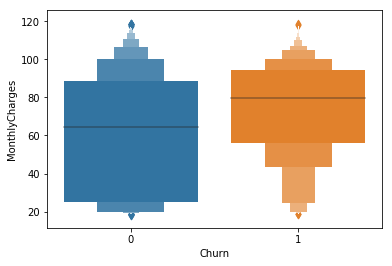

In [91]:
sns.categorical.lvplot(y='MonthlyCharges', x='Churn', data=df_telco);

- Clientes que possuem um gasto maior no total tendem a ser menos rotatidos. Fica subentendido que pelo fato do cliente ser menos rotativo, paga mensalidades por mais tempo. Por isso um gasto maior que clientes rotativos.

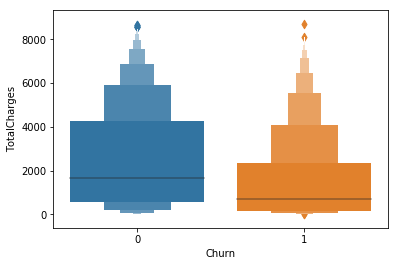

In [107]:
sns.categorical.boxenplot(y='TotalCharges', x='Churn', data=df_telco)

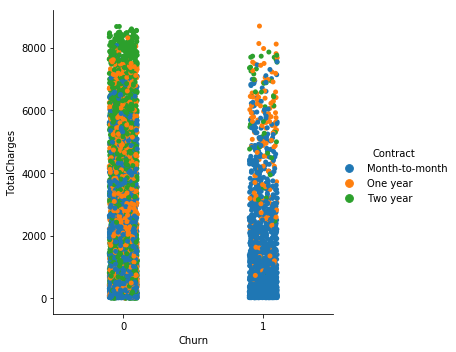

In [105]:
sns.catplot(y='TotalCharges', x='Churn', hue='Contract',data=df_telco2)

- Clientes que possuem planos de 1 e 2 anos tendem a ser menos rotativos. Clientes mensais estão divididos entre rotativos ou não. 

/home/guilherme/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


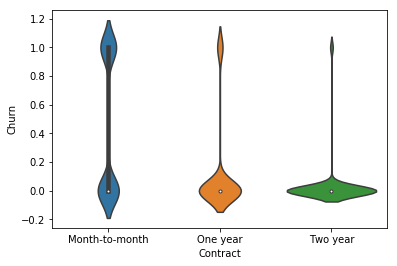

In [113]:
sns.violinplot(x='Contract', y='Churn', data=df_telco2)

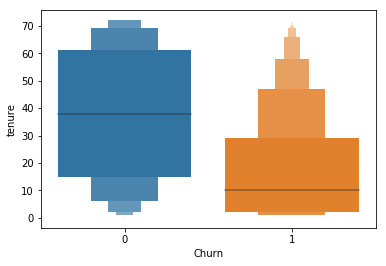

In [114]:
sns.boxenplot(y='tenure', x='Churn', data=df_telco2)

In [51]:
df_telco[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0


In [66]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
df_telco['services'] = df_telco.groupby(cols).ngroup()

In [68]:
features = list(df_telco.columns.drop(['Churn','customerID']))
target = 'Churn'


In [69]:
modelo = RandomForestClassifier()

modelo.fit(
    df_telco[features],
    df_telco[target]
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

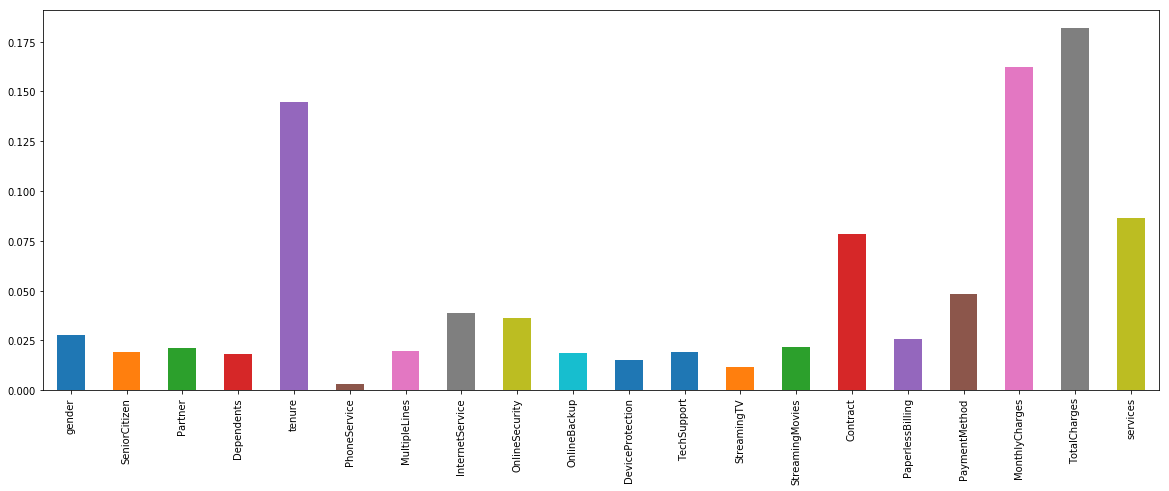

In [70]:
pd.Series(modelo.feature_importances_, features).plot(figsize=(20,7),kind='bar')

In [86]:
features = list(df_telco.columns.drop(['Churn','customerID']))
target = 'Churn'


In [87]:
modelo = RandomForestClassifier()

modelo.fit(
    df_telco[features],
    df_telco[target]
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

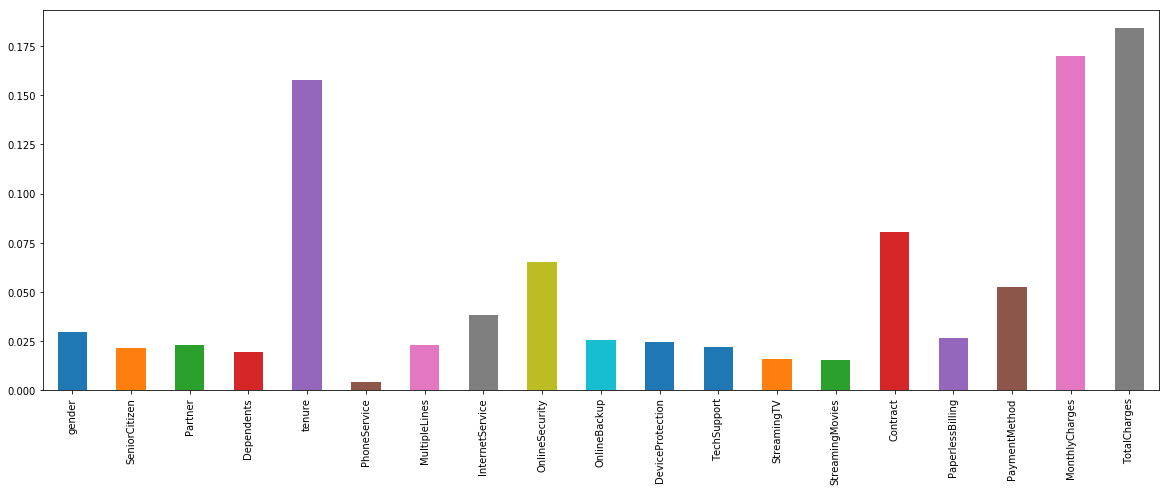

In [88]:
pd.Series(modelo.feature_importances_, features).plot(figsize=(20,7),kind='bar')

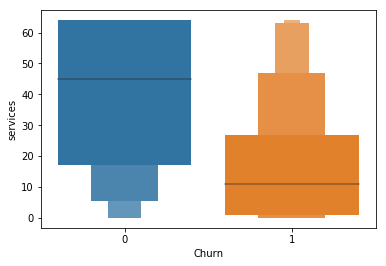

In [75]:
sns.boxenplot(y='services', x='Churn', data=df_telco)

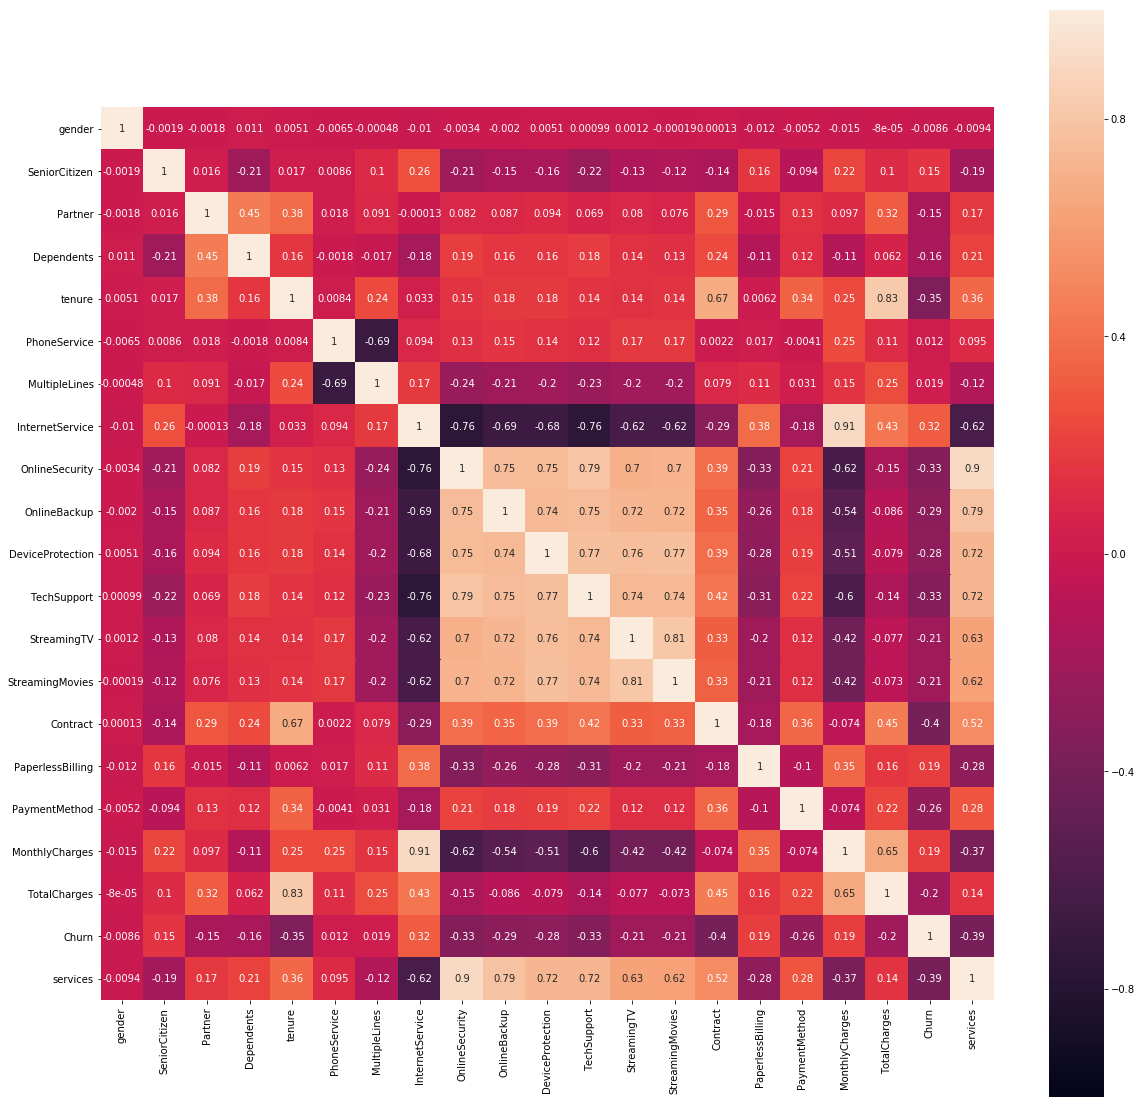

In [76]:
matriz_correlacao = df_telco.corr()
x, y = plt.subplots(figsize=(20,20))

sns.heatmap(
    matriz_correlacao,
    annot=True,
    square=True,
    vmax=1,
    vmin=-1
);

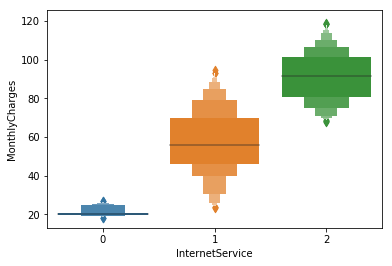

In [80]:
sns.boxenplot(data=df_telco, y='MonthlyCharges', x='InternetService')